1️⃣ Overview

We built an interactive image processing tool for satellite images using the EuroSAT dataset.
It allows users to visually explore edge detection using two classical techniques —
Laplacian of Gaussian (LoG) and Difference of Gaussian (DoG) — in real time.

2️⃣ Dataset

The dataset used is EuroSAT, containing Sentinel-2 RGB satellite images across multiple land cover classes:

AnnualCrop

Forest

River

Residential

Industrial

SeaLake
and more.
Each image represents a 64×64 crop of land seen from above.

3️⃣ Purpose

The purpose of the tool is to:

Demonstrate how LoG and DoG highlight edges and boundaries in satellite imagery.

Show how varying parameters (like kernel size and sigma) change edge intensity and texture clarity.

Provide an interactive interface where changes reflect instantly without rerunning code.

4️⃣ Working Logic

The user selects a class (e.g., Forest or River).

One random image from that class is loaded and converted to grayscale.

Two filters are applied:

LoG (Laplacian of Gaussian): detects fine details and sharp edges by combining Gaussian smoothing + Laplacian edge detection.

DoG (Difference of Gaussian): finds edges by subtracting one blurred version of the image from another with different blur levels.

Both processed outputs are displayed side-by-side with the original image.

5️⃣ Interactive Controls

The interface allows dynamic tuning of:

LoG Kernel Size: controls the neighborhood for smoothing.

Sigma (σ): controls Gaussian blur strength before edge detection.

DoG K1, K2: two Gaussian kernel sizes used in DoG to define the difference scale.

View Mode: switch between RGB or grayscale original images.

These parameters can be adjusted through sliders and dropdowns, and the plots update instantly.

6️⃣ Technologies Used

OpenCV: for image loading and filtering.

Matplotlib: for visualization.

ipywidgets: for interactivity inside Google Colab.

NumPy: for numerical operations.

EuroSAT Dataset (via KaggleHub): for real-world satellite imagery.

7️⃣ Insights

LoG emphasizes fine boundaries like roads, rooftops, and small structures.

DoG highlights broader spatial transitions, such as forest boundaries or river edges.

Adjusting kernel sizes gives a deeper understanding of spatial frequency filtering in remote sensing imagery.

8️⃣ Use Case

This interactive visualization can be used in:

Preprocessing pipeline demos for land cover classification.

Teaching material for image processing & computer vision courses.

Quick parameter tuning before applying filters in large-scale satellite image pipelines.

In [12]:
# Install kagglehub if not already
!pip install -q kagglehub

# Import and download the dataset
import kagglehub

# Download the EuroSAT dataset (Apollo2506)
path = kagglehub.dataset_download("apollo2506/eurosat-dataset")

print("✅ Dataset downloaded to:", path)


100%|██████████| 2.04G/2.04G [00:23<00:00, 94.8MB/s]

Extracting files...


✅ Dataset downloaded to: /root/.cache/kagglehub/datasets/apollo2506/eurosat-dataset/versions/6


In [13]:
import os

# Explore downloaded structure
for root, dirs, files in os.walk(path):
    print(root)
    break  # just show top-level


/root/.cache/kagglehub/datasets/apollo2506/eurosat-dataset/versions/6


In [15]:
import os

base_path = "/root/.cache/kagglehub/datasets/apollo2506/eurosat-dataset/versions/6"

# List all files and folders in this dataset version
for root, dirs, files in os.walk(base_path):
    print(root)
    break  # only show top level



/root/.cache/kagglehub/datasets/apollo2506/eurosat-dataset/versions/6


In [16]:
!ls /root/.cache/kagglehub/datasets/apollo2506/eurosat-dataset/versions/6


EuroSAT  EuroSATallBands


In [17]:
!ls /root/.cache/kagglehub/datasets/apollo2506/eurosat-dataset/versions/6/EuroSAT


AnnualCrop	      Highway	      Pasture	     River     train.csv
Forest		      Industrial      PermanentCrop  SeaLake   validation.csv
HerbaceousVegetation  label_map.json  Residential    test.csv


Available classes: ['Pasture', 'Forest', 'PermanentCrop', 'River', 'Residential', 'HerbaceousVegetation', 'AnnualCrop', 'Highway', 'SeaLake', 'Industrial']
Found 3000 images in /root/.cache/kagglehub/datasets/apollo2506/eurosat-dataset/versions/6/EuroSAT/Residential
Using image: /root/.cache/kagglehub/datasets/apollo2506/eurosat-dataset/versions/6/EuroSAT/Residential/Residential_1956.jpg


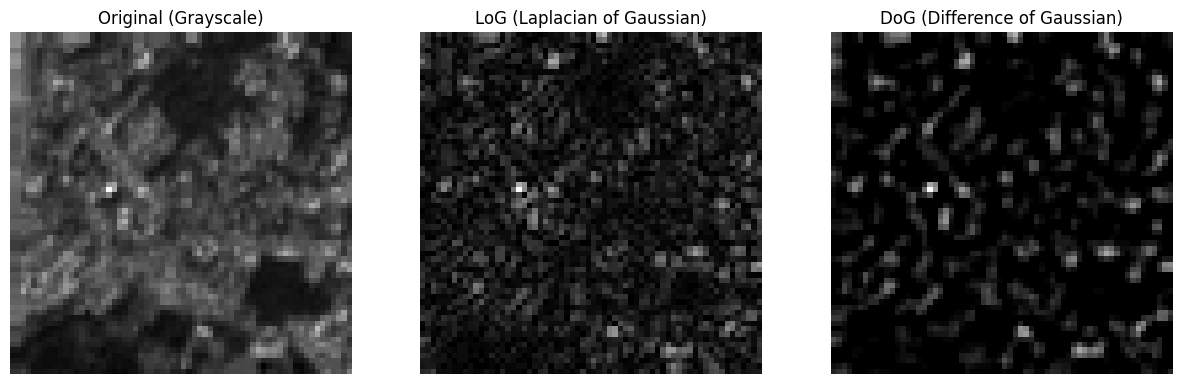

In [18]:
import os, cv2, numpy as np, matplotlib.pyplot as plt
from glob import glob

# ✅ Base directory for EuroSAT RGB dataset
base_dir = "/root/.cache/kagglehub/datasets/apollo2506/eurosat-dataset/versions/6/EuroSAT"

# Check classes
classes = [d for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d))]
print("Available classes:", classes)

# Pick one class for demo — you can change this (e.g. 'Forest', 'River', etc.)
image_dir = os.path.join(base_dir, "Residential")

# Find image files
image_files = glob(os.path.join(image_dir, "*.jpg")) + glob(os.path.join(image_dir, "*.png"))
print(f"Found {len(image_files)} images in {image_dir}")

# --- Handle case if no images found ---
if len(image_files) == 0:
    raise FileNotFoundError("No image files found! Check folder names or file extensions.")

# ✅ Load one sample image
image_path = image_files[0]
print("Using image:", image_path)

image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# --- LoG (Laplacian of Gaussian) ---
blur = cv2.GaussianBlur(gray, (5,5), 0)
log = cv2.Laplacian(blur, cv2.CV_64F)
log = np.uint8(np.absolute(log))

# --- DoG (Difference of Gaussian) ---
gauss1 = cv2.GaussianBlur(gray, (3,3), 0)
gauss2 = cv2.GaussianBlur(gray, (9,9), 0)
dog = cv2.subtract(gauss1, gauss2)

# --- Plot results ---
plt.figure(figsize=(15,5))
plt.subplot(1,3,1); plt.imshow(gray, cmap='gray'); plt.title("Original (Grayscale)"); plt.axis('off')
plt.subplot(1,3,2); plt.imshow(log, cmap='gray'); plt.title("LoG (Laplacian of Gaussian)"); plt.axis('off')
plt.subplot(1,3,3); plt.imshow(dog, cmap='gray'); plt.title("DoG (Difference of Gaussian)"); plt.axis('off')
plt.show()


In [19]:
output_dir = "/content/processed_eurosat"
os.makedirs(output_dir, exist_ok=True)

for cls in classes:
    input_path = os.path.join(base_dir, cls)
    output_path_log = os.path.join(output_dir, "LoG", cls)
    output_path_dog = os.path.join(output_dir, "DoG", cls)
    os.makedirs(output_path_log, exist_ok=True)
    os.makedirs(output_path_dog, exist_ok=True)

    for img_file in glob(os.path.join(input_path, "*.jpg")):
        img = cv2.imread(img_file)
        if img is None:
            continue
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # LoG
        blur = cv2.GaussianBlur(gray, (5,5), 0)
        log = np.uint8(np.absolute(cv2.Laplacian(blur, cv2.CV_64F)))
        cv2.imwrite(os.path.join(output_path_log, os.path.basename(img_file)), log)

        # DoG
        dog = cv2.subtract(cv2.GaussianBlur(gray, (3,3), 0), cv2.GaussianBlur(gray, (9,9), 0))
        cv2.imwrite(os.path.join(output_path_dog, os.path.basename(img_file)), dog)

print("✅ Processed images saved in:", output_dir)


✅ Processed images saved in: /content/processed_eurosat


In [20]:
# Install dependencies
!pip install ipywidgets --quiet

import os, cv2, numpy as np, matplotlib.pyplot as plt
from glob import glob
from ipywidgets import interact, Dropdown, IntSlider, FloatSlider

# ✅ Dataset base directory
base_dir = "/root/.cache/kagglehub/datasets/apollo2506/eurosat-dataset/versions/6/EuroSAT"
classes = [d for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d))]

# --- Function to process and display ---
def visualize_satellite(class_name, gaussian_kernel=5, sigma=1.0, dog_k1=3, dog_k2=9, view="Gray"):
    image_dir = os.path.join(base_dir, class_name)
    image_files = glob(os.path.join(image_dir, "*.jpg")) + glob(os.path.join(image_dir, "*.png"))
    if not image_files:
        print(f"No images found in {class_name}")
        return

    # Pick one random image
    image_path = np.random.choice(image_files)
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # --- LoG ---
    blur = cv2.GaussianBlur(gray, (gaussian_kernel, gaussian_kernel), sigma)
    log = cv2.Laplacian(blur, cv2.CV_64F)
    log = np.uint8(np.absolute(log))

    # --- DoG ---
    gauss1 = cv2.GaussianBlur(gray, (dog_k1, dog_k1), 0)
    gauss2 = cv2.GaussianBlur(gray, (dog_k2, dog_k2), 0)
    dog = cv2.subtract(gauss1, gauss2)

    # --- Display ---
    plt.figure(figsize=(15,5))
    if view == "Gray":
        plt.subplot(1,3,1); plt.imshow(gray, cmap='gray'); plt.title(f"{class_name} - Grayscale"); plt.axis('off')
    else:
        plt.subplot(1,3,1); plt.imshow(image); plt.title(f"{class_name} - RGB"); plt.axis('off')
    plt.subplot(1,3,2); plt.imshow(log, cmap='gray'); plt.title(f"LoG (Kernel={gaussian_kernel}, σ={sigma})"); plt.axis('off')
    plt.subplot(1,3,3); plt.imshow(dog, cmap='gray'); plt.title(f"DoG (K1={dog_k1}, K2={dog_k2})"); plt.axis('off')
    plt.show()

# --- Interactive Controls ---
interact(
    visualize_satellite,
    class_name=Dropdown(options=classes, description="Class:"),
    gaussian_kernel=IntSlider(min=3, max=11, step=2, value=5, description="LoG Kernel"),
    sigma=FloatSlider(min=0.5, max=3.0, step=0.1, value=1.0, description="σ (Sigma)"),
    dog_k1=IntSlider(min=3, max=11, step=2, value=3, description="DoG K1"),
    dog_k2=IntSlider(min=5, max=15, step=2, value=9, description="DoG K2"),
    view=Dropdown(options=["Gray", "RGB"], description="View Mode:")
);


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 15.9 MB/s eta 0:00:00


interactive(children=(Dropdown(description='Class:', options=('Pasture', 'Forest', 'PermanentCrop', 'River', '…